# Implementing a Neural Network w Keras for binary classification, using stochastic gradient descent

imports

In [17]:
import numpy as np
import pandas as pd
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time 
import tensorflow.keras as keras
from tensorflow.python.keras.layers import Dense

Creating & visualizing a dataset

In [18]:
# The data contains 600 examples total
# 300 in class 0 
# 300 in class 1

# Generate the raw data
N = 300
r = np.linspace(1,2*np.pi,N)
x1 = np.array([np.sin(2.*r)*r, np.cos(2*r)*r]).T
x2 = np.array([np.sin(2.*r+np.pi)*r, np.cos(2*r+np.pi)*r]).T

# Compute X and y
X = np.concatenate([x1, x2], axis=0)
print("X shape:")
print(X.shape)
y = np.concatenate([np.ones(N), 0 * np.ones(N)])

# Create DataFrame for visualizaton purposes
df = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y': y
})
df.head()

X shape:
(600, 2)


,x1,x2,y
0,0.909297,-0.416147,1.0
1,0.909824,-0.455930,1.0
2,0.908654,-0.496261,1.0
3,0.905752,-0.537067,1.0
4,0.901081,-0.578277,1.0


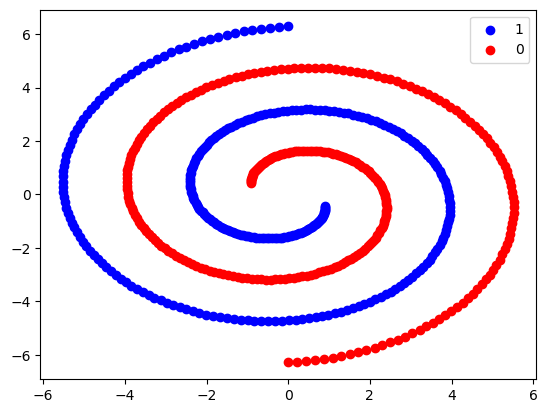

In [19]:
# Visualize data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b')
plt.scatter(X[y != 1, 0], X[y != 1, 1], c='r')
plt.legend(["1","0"])
plt.show()

Splitting Test & Training Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)

(420, 2)
(180, 2)


1. Constructing Neural Network

Step 1: Model Structure

In [21]:
# neural network model object
nn_model = keras.Sequential()

# constructing & adding input layer
input_layer = keras.layers.InputLayer(input_shape = (2,), name = "input")
nn_model.add(input_layer)

# constructing & adding hidden layers
hidden_layer_1 = keras.layers.Dense(units = 64, activation = "relu", name = "hl1")
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units = 32, activation = "relu", name = "hl2")
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units = 8, activation = "relu", name = "hl3")
nn_model.add(hidden_layer_3)

# constructing & adding output layer
# using the sigmoid activation function to map the output to a probability between 0.0 and 1.0 (as it is binary classification)
output_layer = keras.layers.Dense(units = 1, activation='sigmoid', name = 'output')
nn_model.add(output_layer)

nn_model.summary()

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl3 (Dense)                     │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,545 (9.94 KB)

 Trainable params: 2,545 (9.94 KB)

 Non-trainable params: 0 (0.00 B)

Step 2: Defining the optimization algorithm

In [22]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

Step 3: Define the loss function

In [23]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

Step 4: Compile the model

In [24]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

2. Fitting the NN to training data

In [25]:
# we log the accuracy and loss after every 50 epochs
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [26]:
t0 = time.time() # start time
num_epochs = 500

# The fit() method returns a Keras History object, which contains information such as the training loss and accuracy per epoch. 
history = nn_model.fit(
    X_train,
    y_train,
    callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n = 50)],
    verbose = 0,
    epochs = num_epochs,
)

t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

Epoch [50/ 500], Accuracy: 0.6571, Loss: 0.6545
Epoch [100/ 500], Accuracy: 0.6524, Loss: 0.6421
Epoch [150/ 500], Accuracy: 0.7905, Loss: 0.4658
Epoch [200/ 500], Accuracy: 0.9786, Loss: 0.0757
Epoch [250/ 500], Accuracy: 1.0000, Loss: 0.0154
Epoch [300/ 500], Accuracy: 1.0000, Loss: 0.0131
Epoch [350/ 500], Accuracy: 1.0000, Loss: 0.0062
Epoch [400/ 500], Accuracy: 1.0000, Loss: 0.0044
Epoch [450/ 500], Accuracy: 1.0000, Loss: 0.0034
Epoch [500/ 500], Accuracy: 1.0000, Loss: 0.0027
Elapsed time: 5.84s


3. Evaluating the model's performance

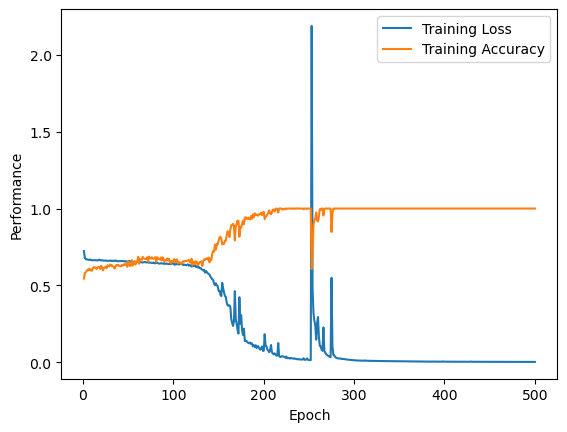

In [27]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [28]:
# evaluate() returns loss & accuracy score of our model on test data
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose = 0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Loss:  0.002556879771873355 Accuracy:  1.0


In [31]:
# making predictions!
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test)
print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= 0.5:
        class_pred = 1
    else:
        class_pred = 0
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
Predictions for the first 10 examples:
Probability			Class
[0.00034084]			0
[2.810363e-06]			0
[0.00119944]			0
[0.00010401]			0
[0.9998751]			1
[9.814583e-05]			0
[0.00060804]			0
[0.99918133]			1
[2.299706e-06]			0
[0.999974]			1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


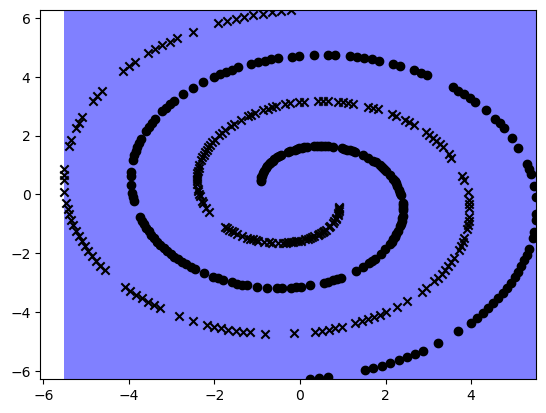

In [32]:
# visualizing decision boundaries that the model learned
from numpy.matlib import repmat

symbols = ["ko","kx"]
marker_symbols = ['o', 'x']
mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
classvals = np.unique(y_train)

plt.figure()

res=300
xrange = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]),res)
yrange = np.linspace(min(X_test[:, 1]), max(X_test[:, 1]),res)
pixelX = repmat(xrange, res, 1)
pixelY = repmat(yrange, res, 1).T


xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T
logits = nn_model.predict(xTe, steps = 1)
testpreds = logits.argmax(axis = 1)

testpreds[testpreds == 0] = -1
Z = testpreds.reshape(res, res)
#Z[0,0] = 1 # optional: scale the colors correctly
plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

for idx, c in enumerate(classvals):
    plt.scatter(X_train[y_train == c,0],
                X_train[y_train == c,1],
                marker=marker_symbols[idx],
                color='k')

plt.axis('tight')
plt.show()